<a href="https://colab.research.google.com/github/DouglasRm2/Data-Cleaning-Data-wrangling/blob/main/desafio_5_mackson_douglas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas-profiling==3.3.0

In [2]:
import pandas  as pd
from pandas_profiling import ProfileReport

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


/usr/local/lib/python3.10/dist-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/usr/local/lib/python3.10/dist-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:


In [3]:
df = pd.read_csv('data_set.csv', index_col=0)
display(df)

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
InvoiceNo,,,,,,,
536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 08:26,2.55,17850.0,United Kingdom
536365,71053,WHITE METAL LANTERN,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 08:26,2.75,17850.0,United Kingdom
536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 541909 entries, 536365 to 581587
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   StockCode    541909 non-null  object 
 1   Description  540455 non-null  object 
 2   Quantity     541909 non-null  int64  
 3   InvoiceDate  541909 non-null  object 
 4   UnitPrice    541909 non-null  float64
 5   CustomerID   406829 non-null  float64
 6   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611121,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
df.isna() .sum()

StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
df[df.duplicated(keep=False)]

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
InvoiceNo,,,,,,,
536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
...,...,...,...,...,...,...,...
581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom
581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom


In [8]:
(   df.
    groupby(df.columns.tolist(), dropna=False,)
    .size()
    .to_frame('n_duplicados')
    .query('n_duplicados > 1')
)

n_duplicados
StockCode Description                  Quantity InvoiceDate      UnitPrice CustomerID Country                     
10120     DOGGY RUBBER                  1       3/30/2011 12:02  0.21      16657.0    United Kingdom             2
10125     MINI FUNKY DESIGN TAPES       1       7/4/2011 12:18   0.85      17975.0    United Kingdom             2
10133     COLOURING PENCILS BROWN TUBE  1       6/24/2011 14:16  0.42      15850.0    United Kingdom             2
                                        10      8/22/2011 13:30  0.42      17585.0    United Kingdom             2
10135     COLOURING PENCILS BROWN TUBE  1       10/13/2011 13:58 1.25      14234.0    United Kingdom             2
...                                                                                                            ...
90206C    CRYSTAL DIAMANTE STAR BROOCH  1       11/9/2011 12:00  4.95      13623.0    United Kingdom             2
90209B    GREEN ENAMEL+GLASS HAIR COMB  1       8/3/2011 12:54   2.10      16324.0    United Kingdom             2
M         Manual                        48      10/24/2011 10:43 1.50      14607.0    United Kingdom             6
POST      POSTAGE                       1       10/26/2011 14:39 18.00     12569.0    Germany                    2
S         SAMPLES                      -1       2/21/2011 14:25  9.74      NaN        United Kingdom             2

[5423 rows x 1 columns]

In [9]:
df = df.dropna()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 536365 to 581587
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   StockCode    406829 non-null  object 
 1   Description  406829 non-null  object 
 2   Quantity     406829 non-null  int64  
 3   InvoiceDate  406829 non-null  object 
 4   UnitPrice    406829 non-null  float64
 5   CustomerID   406829 non-null  float64
 6   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 24.8+ MB


In [11]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401564 entries, 536365 to 581587
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   StockCode    401564 non-null  object 
 1   Description  401564 non-null  object 
 2   Quantity     401564 non-null  int64  
 3   InvoiceDate  401564 non-null  object 
 4   UnitPrice    401564 non-null  float64
 5   CustomerID   401564 non-null  float64
 6   Country      401564 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 24.5+ MB


In [12]:
df['CustomerID'] = df['CustomerID'].astype(int)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401564 entries, 536365 to 581587
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   StockCode    401564 non-null  object 
 1   Description  401564 non-null  object 
 2   Quantity     401564 non-null  int64  
 3   InvoiceDate  401564 non-null  object 
 4   UnitPrice    401564 non-null  float64
 5   CustomerID   401564 non-null  int64  
 6   Country      401564 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 24.5+ MB


In [14]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401564 entries, 536365 to 581587
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   StockCode    401564 non-null  object        
 1   Description  401564 non-null  object        
 2   Quantity     401564 non-null  int64         
 3   InvoiceDate  401564 non-null  datetime64[ns]
 4   UnitPrice    401564 non-null  float64       
 5   CustomerID   401564 non-null  int64         
 6   Country      401564 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 24.5+ MB


In [16]:
df.head()

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
InvoiceNo,,,,,,,
536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401564 entries, 536365 to 581587
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   StockCode    401564 non-null  object        
 1   Description  401564 non-null  object        
 2   Quantity     401564 non-null  int64         
 3   InvoiceDate  401564 non-null  datetime64[ns]
 4   UnitPrice    401564 non-null  float64       
 5   CustomerID   401564 non-null  int64         
 6   Country      401564 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 24.5+ MB


In [18]:
df['Quantity'].sum()

4892372

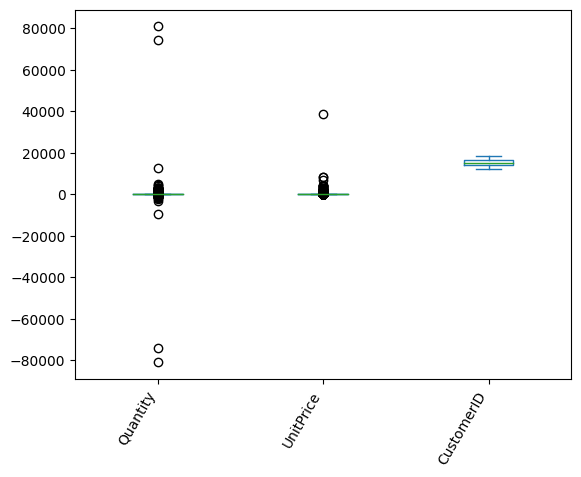

In [19]:
df.plot.box();
plt.xticks(rotation=60, ha='right');

In [20]:
from sklearn.preprocessing import scale

In [21]:
OutlierQuantity = (df['Quantity'] <= 10000)
OutlierUnitPrice = (df['UnitPrice'] <= 5000)

In [22]:
print(df.head())

          StockCode                          Description  Quantity  \
InvoiceNo                                                            
536365       85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
536365        71053                  WHITE METAL LANTERN         6   
536365       84406B       CREAM CUPID HEARTS COAT HANGER         8   
536365       84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
536365       84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

                  InvoiceDate  UnitPrice  CustomerID         Country  
InvoiceNo                                                             
536365    2010-12-01 08:26:00       2.55       17850  United Kingdom  
536365    2010-12-01 08:26:00       3.39       17850  United Kingdom  
536365    2010-12-01 08:26:00       2.75       17850  United Kingdom  
536365    2010-12-01 08:26:00       3.39       17850  United Kingdom  
536365    2010-12-01 08:26:00       3.39       17850  United Kingdom  


In [23]:
print("Outliers antes do tratamento")
outliers = df[(df['Quantity'] > 10000) & (df['UnitPrice'] > 5000)]
print(outliers)

df = df[~((df['Quantity'] > 10000) & (df['UnitPrice'] > 5000))]

df = df[~((df['Quantity'] > 10000) & (df['UnitPrice'] > 5000))]

Outliers antes do tratamento
Empty DataFrame
Columns: [StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []


In [24]:
print(df.head())

          StockCode                          Description  Quantity  \
InvoiceNo                                                            
536365       85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
536365        71053                  WHITE METAL LANTERN         6   
536365       84406B       CREAM CUPID HEARTS COAT HANGER         8   
536365       84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
536365       84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

                  InvoiceDate  UnitPrice  CustomerID         Country  
InvoiceNo                                                             
536365    2010-12-01 08:26:00       2.55       17850  United Kingdom  
536365    2010-12-01 08:26:00       3.39       17850  United Kingdom  
536365    2010-12-01 08:26:00       2.75       17850  United Kingdom  
536365    2010-12-01 08:26:00       3.39       17850  United Kingdom  
536365    2010-12-01 08:26:00       3.39       17850  United Kingdom  


In [25]:
outliers_apos_tratamento = df[(df['Quantity'] > 10000) & (df['UnitPrice'] > 5000)]
print(outliers_apos_tratamento)

Empty DataFrame
Columns: [StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []


In [26]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,401564.000000,401564.000000,401564.000000
mean,12.183293,3.474085,15281.200242
std,250.295275,69.767499,1714.035339
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16788.000000
max,80995.000000,38970.000000,18287.000000


In [27]:
df['Preço_T_da_compra'] = df['Quantity'] * df['UnitPrice']
df.head()

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Preço_T_da_compra
InvoiceNo,,,,,,,,
536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


**Criação da tabela fazendo a multiplicação das tabelas de QUANTIDADE e PREÇO UNITÁRIO**

In [28]:
ultima_compra = df['InvoiceDate'].max()
print(f"A última compra foi em {ultima_compra}")

A última compra foi em 2011-12-09 12:50:00


In [29]:
df['Country']

InvoiceNo
536365    United Kingdom
536365    United Kingdom
536365    United Kingdom
536365    United Kingdom
536365    United Kingdom
               ...      
581587            France
581587            France
581587            France
581587            France
581587            France
Name: Country, Length: 401564, dtype: object

In [30]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

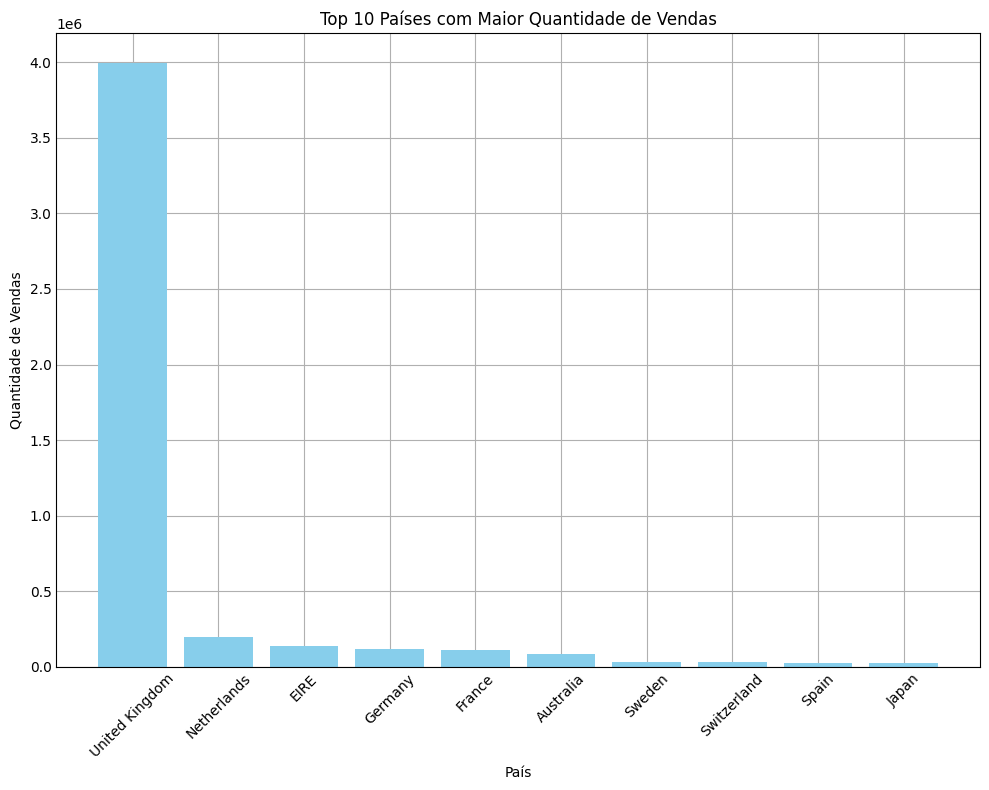

In [56]:
top_10 = df.groupby('Country')['Quantity'].sum().reset_index()
top_10 = top_10.sort_values(by='Quantity', ascending=False)
#print("Top 10 países com maior valor em vendas:")
top_10 = top_10.head(10)
#print(top_10)

plt.figure(figsize=(10, 8))
plt.bar(top_10['Country'], top_10['Quantity'], color='skyblue')
plt.xlabel('País')
plt.ylabel('Quantidade de Vendas')
plt.title('Top 10 Países com Maior Quantidade de Vendas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [32]:
df['Description'].unique()

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ...,
       'PINK CRYSTAL SKULL PHONE CHARM',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], dtype=object)

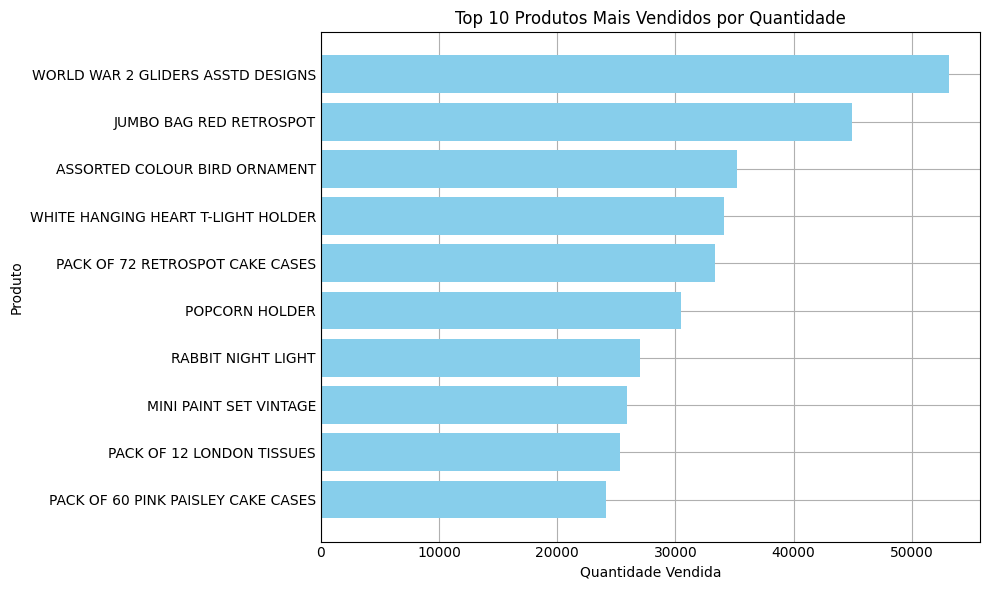

In [74]:
# top10_vendas = df.groupby('Quantity')['Description'].sum().reset_index()
# top10_vendas = top10_vendas.sort_values(by='Description', ascending=False)
# print("Top 10 produtos mais vendidos")
# top10_vendas = top10_vendas.head(10)
# print(top10_vendas)

top10_vendas = df.groupby('Description')['Quantity'].sum().reset_index()
top10_vendas = top10_vendas.sort_values(by='Quantity', ascending=False).head(10)

#print("Top 10 produtos mais vendidos por quantidade:")
#print(top10_vendas)

plt.figure(figsize=(10, 6))
plt.barh(top10_vendas['Description'], top10_vendas['Quantity'], color='skyblue')  # Usar barh para barras horizontais
plt.xlabel('Quantidade Vendida')
plt.ylabel('Produto')
plt.title('Top 10 Produtos Mais Vendidos por Quantidade')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()




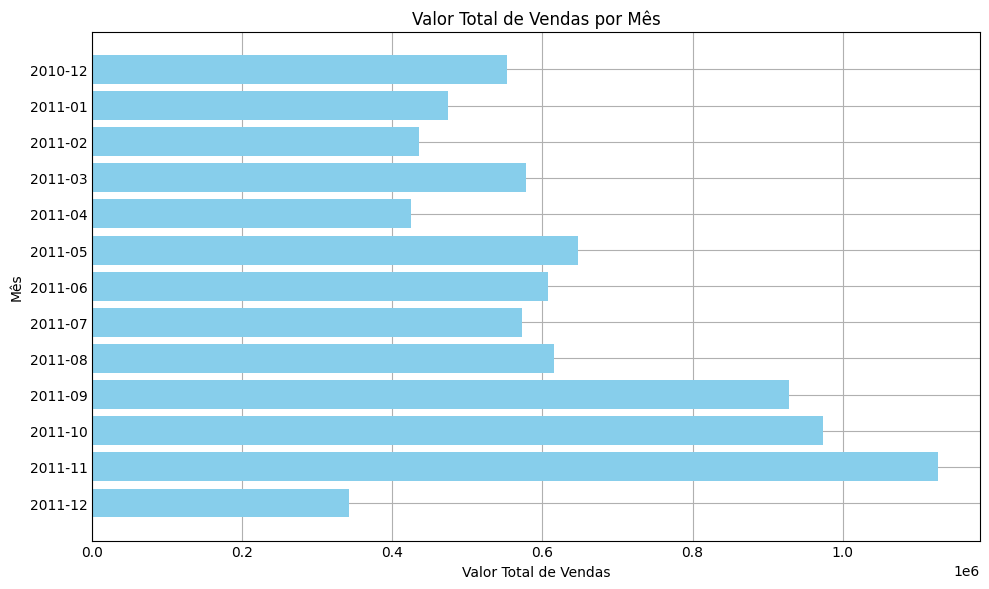

In [79]:
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')
valor_venda_total_por_mes = df.groupby('YearMonth')['Preço_T_da_compra'].sum().reset_index()
#print("Valor total de vendas por mês:")
#print(valor_venda_total_por_mes)


plt.figure(figsize=(10, 6))
plt.barh(valor_venda_total_por_mes['YearMonth'].astype(str), valor_venda_total_por_mes['Preço_T_da_compra'], color='skyblue')
plt.xlabel('Valor Total de Vendas')
plt.ylabel('Mês')
plt.title('Valor Total de Vendas por Mês')
plt.gca().invert_yaxis()  # Inverter a ordem dos meses para o mais recente ficar no topo
plt.tight_layout()
plt.show()

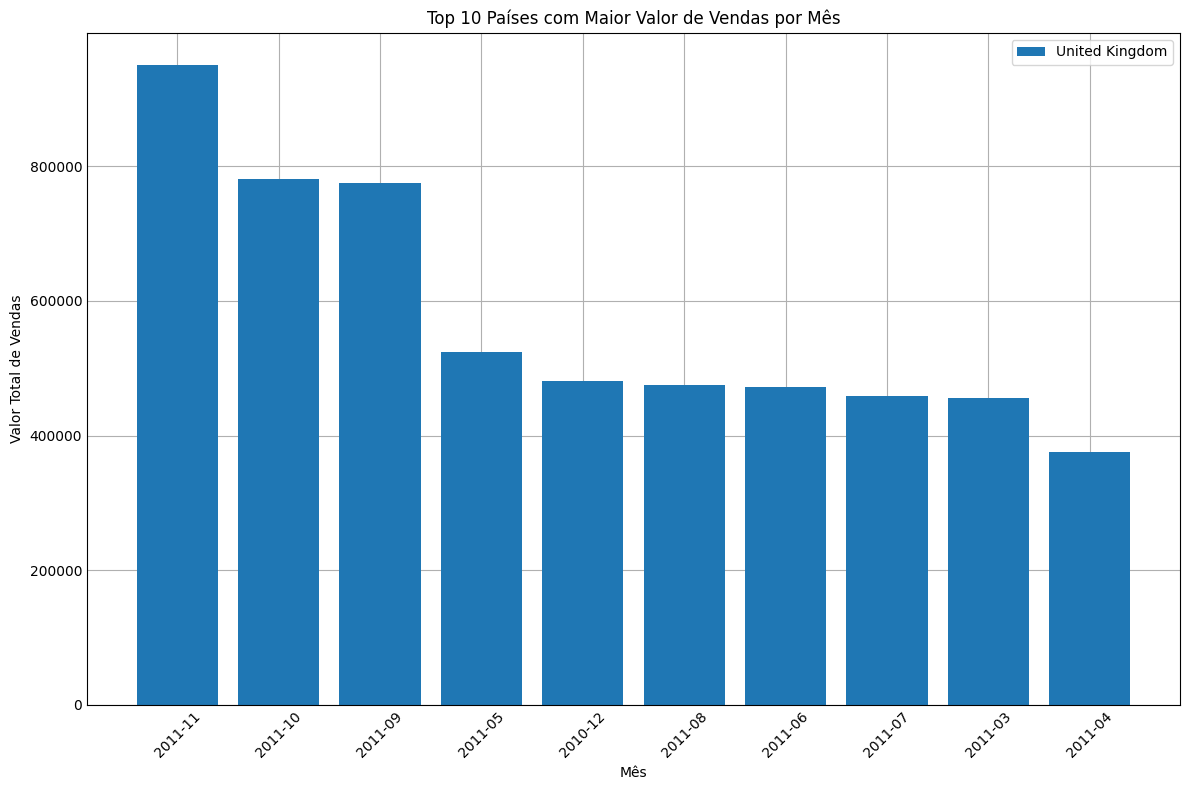

In [82]:
vendas_total_mes_pais = df.groupby(['YearMonth', 'Country'])['Preço_T_da_compra'].sum().reset_index()
vendas_total_mes_pais = vendas_total_mes_pais.sort_values(by='Preço_T_da_compra', ascending=False)
#print("Valor total de vendas por mês e país:" )

vendas_total_mes_pais = vendas_total_mes_pais.head(10)
#rint(vendas_total_mes_pais)



plt.figure(figsize=(12, 8))
for country in vendas_total_mes_pais['Country'].unique():
    data = vendas_total_mes_pais[vendas_total_mes_pais['Country'] == country]
    plt.bar(data['YearMonth'].astype(str), data['Preço_T_da_compra'], label=country)

plt.xlabel('Mês')
plt.ylabel('Valor Total de Vendas')
plt.title('Top 10 Países com Maior Valor de Vendas por Mês')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [37]:
ultima_compra = df['InvoiceDate'].max()
print(f"A última compra foi em {ultima_compra}")

A última compra foi em 2011-12-09 12:50:00


In [38]:
df.head()

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Preço_T_da_compra,YearMonth
InvoiceNo,,,,,,,,,
536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12
536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12
536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12
536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12
536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12


In [39]:
recencia = df.groupby('CustomerID')['InvoiceDate'].max().reset_index()
recencia['Recencia'] = (ultima_compra - recencia['InvoiceDate']).dt.days
recencia = recencia[['CustomerID','Recencia']]

print("Recência por cliente:")
print(recencia.head())

Recência por cliente:
   CustomerID  Recencia
0       12346       325
1       12347         1
2       12348        74
3       12349        18
4       12350       309


In [40]:
frequencia =df.groupby('CustomerID')['InvoiceDate'].nunique().reset_index()
frequencia.columns = ['CustomerID', 'Frequencia']

print("Frequência por cliente:")
print(frequencia.head())

Frequência por cliente:
   CustomerID  Frequencia
0       12346           2
1       12347           7
2       12348           4
3       12349           1
4       12350           1


In [41]:
ticket_medio = df.groupby('CustomerID')['Preço_T_da_compra'].mean().reset_index()
ticket_medio.columns = ['CustomerID', 'Ticket_medio']

print("Ticket médio por cliente:")
print(ticket_medio.head())

Ticket médio por cliente:
   CustomerID  Ticket_medio
0       12346      0.000000
1       12347     23.681319
2       12348     57.975484
3       12349     24.076027
4       12350     19.670588


In [42]:
rfm = recencia.merge(frequencia, on='CustomerID').merge(ticket_medio, on='CustomerID')
print(rfm.head())

   CustomerID  Recencia  Frequencia  Ticket_medio
0       12346       325           2      0.000000
1       12347         1           7     23.681319
2       12348        74           4     57.975484
3       12349        18           1     24.076027
4       12350       309           1     19.670588
